In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [26]:
X_train = pd.read_csv("X_train.txt", delim_whitespace = True, header=None)
X_test = pd.read_csv("X_test.txt", delim_whitespace = True, header=None)
y_train = pd.read_csv("y_train.txt", delim_whitespace = True, header=None, names = ["label"])
y_test = pd.read_csv("y_test.txt", delim_whitespace = True, header=None, names = ["label"])

## Checking Distributions

In [29]:
def label_activity(x):
    if x["label"] == 1:
        x["activity"] = "Walking"
    elif x["label"] == 2:
        x["activity"] = "Walking upstairs"
    elif x["label"] == 3:
        x["activity"] = "Walking downstairs"
    elif x["label"] == 4:
        x["activity"] = "Sitting"
    elif x["label"] == 5:
        x["activity"] = "Standing"
    else: 
        x["activity"] = "Laying"
    return x

In [32]:
y_train["activity"] = np.nan
y_train = y_train.apply(label_activity, axis = 1)

In [34]:
y_train.isnull().any()

label       False
activity    False
dtype: bool

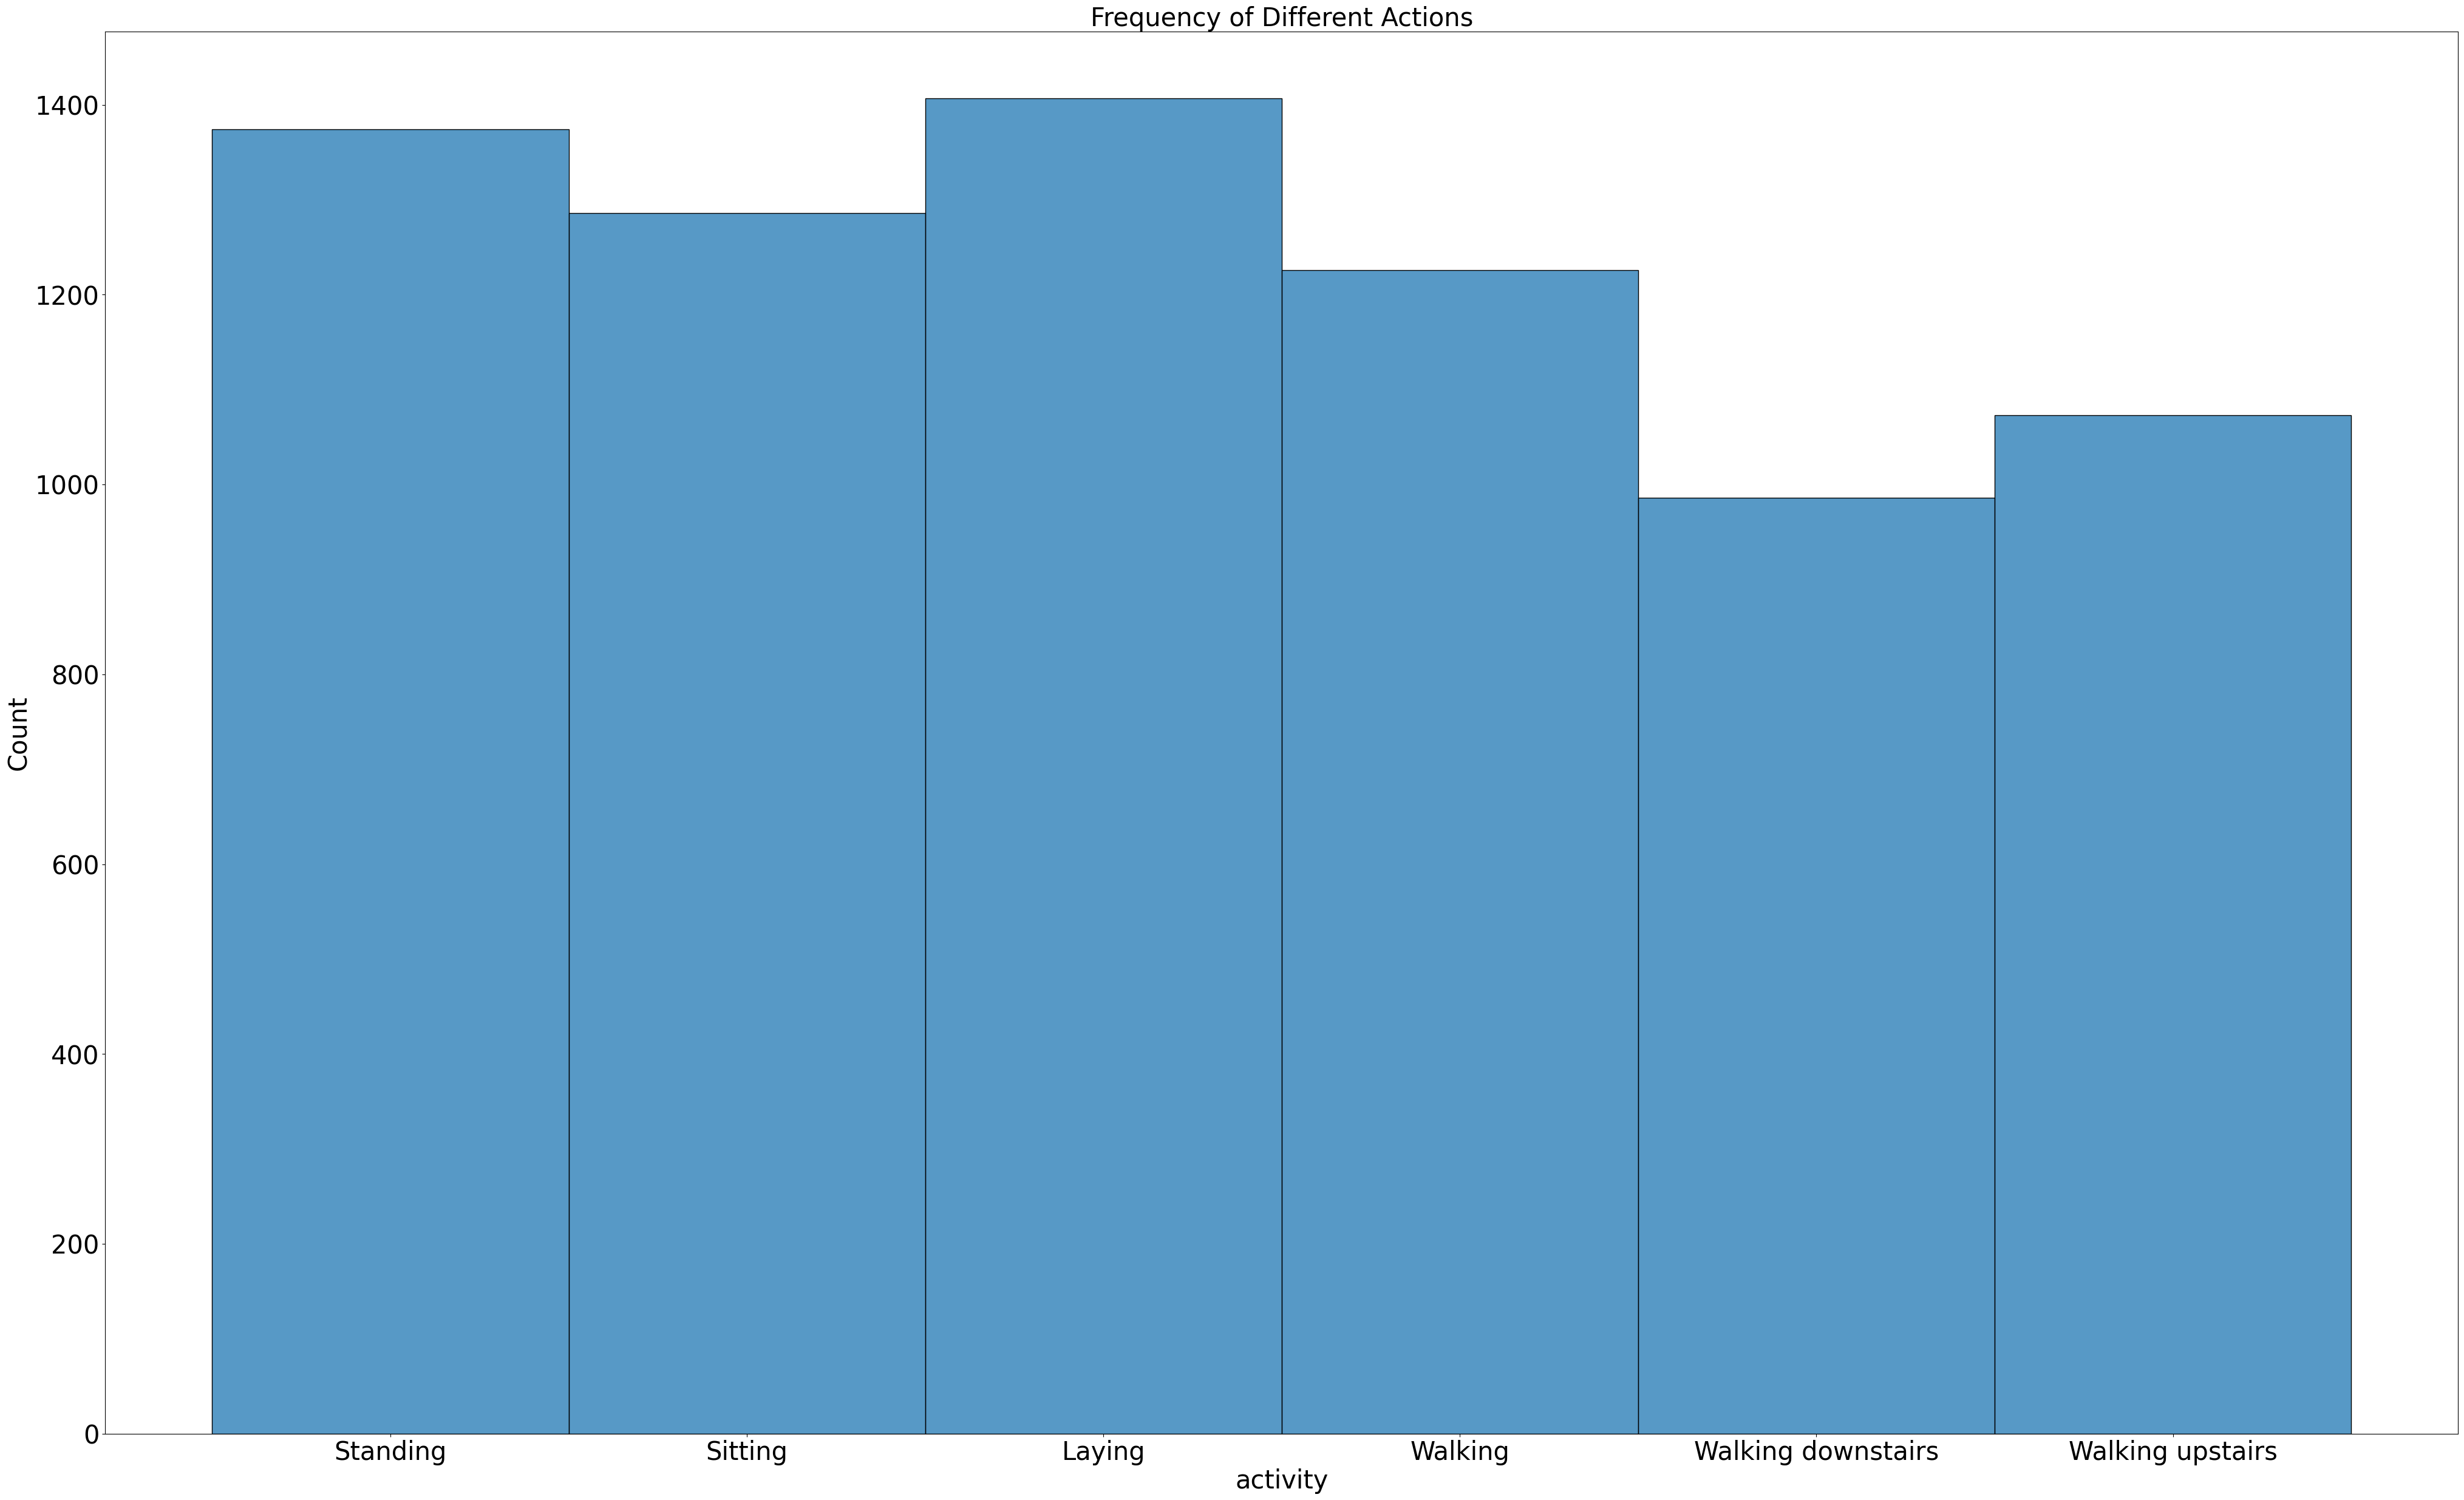

In [37]:
plt.figure(figsize = (50, 30))
plt.rcParams['font.size'] = '30'
sns.histplot(y_train["activity"])
plt.title("Frequency of Different Actions", fontsize = 30)
plt.show()

From the training data, it is observed that the classes are balanced. So any classical linear / non-linear ML model is expected to perform well on the data.

## Training and validation

### Linear SVC

In [42]:
model = SVC(kernel = 'linear')
X = X_train
y = y_train["label"]

scores = cross_validate(model, X, y, cv = 10, scoring=('accuracy', 'f1_macro'))

In [46]:
print("Accuracy:", scores["test_accuracy"])
print("F1:", scores["test_f1_macro"])

Accuracy: [0.97690217 0.8736413  0.96598639 0.8585034  0.96190476 0.96190476
 0.98503401 0.97278912 0.98367347 0.98095238]
F1: [0.97553838 0.85603571 0.96353337 0.85185052 0.96171529 0.9607159
 0.98566595 0.9695834  0.98493174 0.98244026]


The linear model works pretty well except 2 cases where the scores were not as good. We can check non-linear models for better results.

### Non Linear SVC

In [47]:
model = SVC(kernel = 'rbf')
X = X_train
y = y_train["label"]

scores = cross_validate(model, X, y, cv = 10, scoring=('accuracy', 'f1_macro'))
print("Accuracy:", scores["test_accuracy"])
print("F1:", scores["test_f1_macro"])

Accuracy: [0.98097826 0.87228261 0.96326531 0.85578231 0.94557823 0.92653061
 0.97959184 0.95510204 0.95918367 0.95918367]
F1: [0.98088518 0.85770145 0.96229642 0.85107793 0.94902056 0.92615444
 0.97954155 0.94990419 0.96144072 0.96212506]


In [48]:
SVC(kernel = 'poly', degree = 8)

X = X_train
y = y_train["label"]

scores = cross_validate(model, X, y, cv = 10, scoring=('accuracy', 'f1_macro'))
print("Accuracy:", scores["test_accuracy"])
print("F1:", scores["test_f1_macro"])

Accuracy: [0.98097826 0.87228261 0.96326531 0.85578231 0.94557823 0.92653061
 0.97959184 0.95510204 0.95918367 0.95918367]
F1: [0.98088518 0.85770145 0.96229642 0.85107793 0.94902056 0.92615444
 0.97954155 0.94990419 0.96144072 0.96212506]


From the analysis, it is observed that the data is linearly seperable, which is why there is not much difference between the performance of linear and non-linear models

## Checking on test set

In [52]:
model = SVC(kernel = 'linear')

model.fit(X, y)
y_pred = model.predict(X_test)

print("Accuracy on test:", model.score(X_test, y_test))
print("F1 on test:", f1_score(y_test, y_pred, average='macro'))

Accuracy on test: 0.9640312181879878
F1 on test: 0.9641983433163016


We can again verify that the linear model has worked quite well on the test set.